In [1]:


import matplotlib.pyplot as plt
import numpy as np #For creating the bar chart numerical ops
from matplotlib import cm #For color mapping
import requests
import pandas as pd
import re #For tokenizing the content


Fetch content from Wikipedia by making an HTTP GET request to
the Wikipedia API. The article_name parameter is the name of the article to fetch. It returns the JSON response from the API.

In [2]:


article_name = "Ozone_layer"

def get_content(article_name):
    url = f"https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "titles": article_name,
        "prop": "revisions",
        "rvprop": "content",
        "formatversion": 2
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        return data
    else:
        print(f"Error: {response.status_code}")
        return None



Clean the data; merge the contents of the pages into a single string
and return it. Extracts the pages from the data and concatenates the
content of the pages into a single string.

In [3]:

def merge_contents(data):
    pages = data["query"]["pages"]
    content = ""
    for page in pages:
        content += page["revisions"][0]["content"]
    return content


Tokenize the content by splitting it into words. The content is split
by spaces and newline characters. Returns a list of tokens (words).

In [4]:

def tokenize(content):
    splitters = [" ", "\n"]
    regex_pattern = "|".join(map(re.escape, splitters))
    tokens = re.split(regex_pattern, content)
    return tokens


Update the collection of words for them to be lower case

In [5]:

def lower_collection(collection):
    return [word.lower() for word in collection]


Count the number of occurences of each word in the collection. Returns a dictionary where the keys are the words and the values are the counts.


In [6]:
def count_frequency(collection):
    frequency = {}
    for word in collection:
        if word in frequency:
            frequency[word] += 1
        else:
            frequency[word] = 1
    return frequency


Filter out insignificant words from the frequency dictionary. The words to filter out are stored in the stopwords list. Returns a new
dictionary with the insignificant words removed.

In [7]:

stop_words = ["the", "a", "an", "in", "on", "of", "and", "for", "to", "from", "with", "by", "as", "at", "that", "this", "these", "those", "then", "than", "thus", "so", "or", "but", "not", "is", "are", "was", "were", "be", "being", "been", "have", "has", "had", "do", "does", "did", "can", "could", "will", "would", "shall", "should", "may", "might", "must", "it", "its", "they", "their", "them", "he", "his", "him", "she", "her", "it", "its", "they", "their", "them", "he", "his", "him", "she", "her", "i", "me", "my", "mine", "you", "your", "yours", "we", "us", "our", "ours", "yourself", "yourselves", "myself", "ourselves", "himself", "herself", "itself", "themselves", "each", "every", "either", "neither", "some", "any", "all", "most", "several", "few", "many", "much", "more", "less", "least", "own", "other", "another", "such", "what", "which", "who", "whom", "whose", "where", "when", "why", "how", "if", "whether", "either", "or", "neither", "nor", "both", "and", "but", "however", "although", "though", "even", "just", "only", "unless", "until", "while", "because", "since", "so", "therefore", "thus", "hence", "accordingly", "consequently", "furthermore", "moreover", "meanwhile", "first", "second", "third", "fourth", "fifth", "sixth", "seventh", "eighth", "ninth", "tenth", "one", "two", "three"]
def remove_stop_words(words, stop_words):
    return [word for word in words if word not in stop_words and word.strip() and word.isalpha()]


Get the greatest frequency words

In [8]:
def get_most_frequent(frequency, n):
    sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    words = [item[0] for item in sorted_frequency[:n]]
    counts = [item[1] for item in sorted_frequency[:n]]
    return words, counts
    


Fetch the article content:

In [9]:
data = get_content(article_name)
if data:
    merge_contents(data)
    merge_content = merge_contents(data)
    collection = tokenize(merge_content)
    collection_lower = lower_collection(collection)
    collection_filtered = remove_stop_words(collection_lower, stop_words)
    frequency = count_frequency(collection_filtered)
    top_words, top_counts = get_most_frequent(frequency, 25)



Create a DataFrame from the top_words and top_counts lists to create a table


In [10]:

df = pd.DataFrame({'Words': top_words, 'Frequency': top_counts})
# Display the DataFrame as a table with borders
print(df.to_string(index=False))



        Words  Frequency
        ozone         97
        layer         28
    radiation         17
        about         14
  ultraviolet         14
      journal         14
      climate         13
           uv         12
    depletion         11
   atmosphere          9
stratospheric          9
          web          9
         over          8
         book          8
      surface          7
      percent          7
         skin          7
         into          7
          air          7
     northern          6
       united          6
      nations          6
         also          6
    antarctic          6
         band          5


Generate a list of colors from the 'viridis' colormap

In [11]:

n = len(top_words) #Number of words/bars
colors = cm.viridis(np.linspace(0, 1, n)) #Generate a list of n colors


Create a bar chart

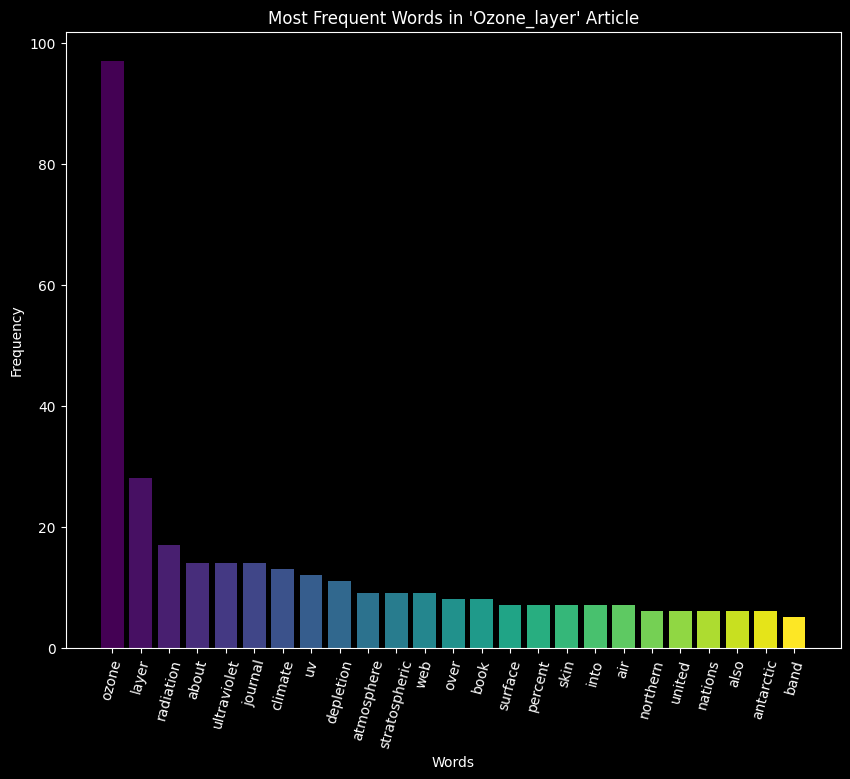

In [12]:

plt.style.use("dark_background")
plt.figure(figsize=(10, 8)) # figure size; 10" wide, 8" tall
plt.bar(top_words, top_counts, color=colors) #Create a bar chart with the top words and their counts
# plt.bar(top_words, top_counts, color="skyblue")
plt.xlabel("Words") #Label for x-axis
plt.ylabel("Frequency") #Label for y-axis
plt.title(f"Most Frequent Words in '{article_name}' Article") #Title of the bar chart
plt.xticks(rotation=75) #Rotate the x-axis labels
plt.show() #Display the bar chart



